#**Task 2**
#Author: NAYANTARA THOMAS
## From given Iris dataset, predict the optimum no:of clusters and represent it visually

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
#Load dataset
iris= datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#**Determining K**

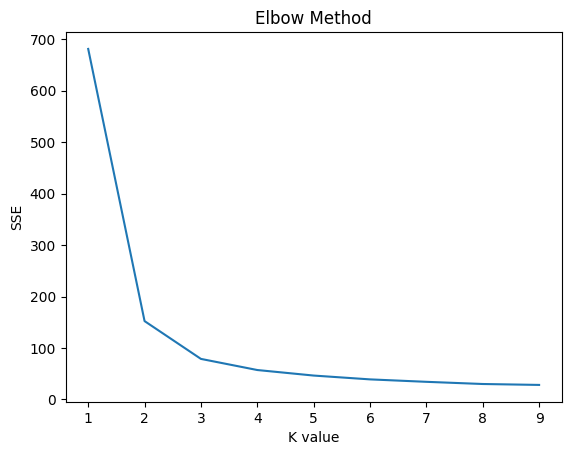

In [ ]:
X = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
sse=[]
for k in range(1,10):
  kmeans=KMeans(n_clusters=k, init='k-means++',max_iter=300,random_state=0,n_init=10)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)#finding sum of squares of each k value

#Elbow method
plt.plot(range(1,10),sse)
plt.title('Elbow Method')
plt.xlabel('K value')
plt.ylabel('SSE')
plt.show()


##Here, elbow value = 3. Hence we choose K value as 3.

In [ ]:
#Creating K-means classifier
kmeans=KMeans(n_clusters=3, init='k-means++',max_iter=300,random_state=0,n_init=10)
y_kmeans=kmeans.fit_predict(X)

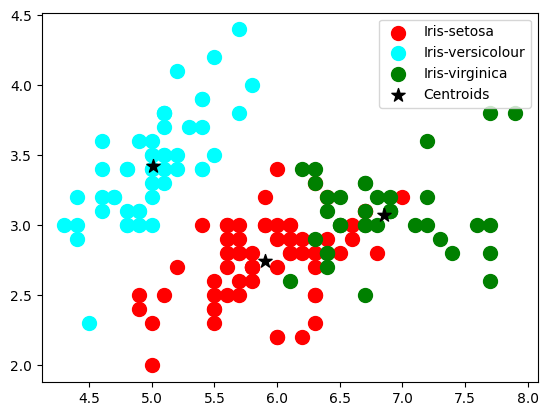

In [ ]:
#Visualising clusters on first 2 cols
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa',)
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            s = 100, c = 'cyan', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'black', label = 'Centroids',marker='*')

plt.legend()
